## 타이타닉호 생존율 분석

### 상관분석 / 상관계수 / 피어슨 / 상관계수 / 히트맵

#### 데이터셋 수집

In [68]:
import seaborn as sns
import pandas as pd

In [69]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [70]:
titanic.to_csv('./data/titanic.csv',encoding='utf8',index=True)

#### 결축치 파악

In [71]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### 결측치 치환

- titanic.age : Nan -> A
- 891 명 데이터에서 중간값을 찾아서 치환

In [72]:
titanic.age.median()

28.0

In [73]:
# 나이 결측치 치환

titanic.age = titanic.age.fillna(titanic.age.median())

In [74]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [76]:
titanic.embarked = titanic.embarked.fillna('S')

In [77]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [78]:

titanic.embark_town = titanic.embark_town.fillna('Southampton')

In [79]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
## 승선 데크를 확인

titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [81]:
titanic.deck = titanic.deck.fillna('C')

In [82]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

##### 차트 시각화

In [83]:
import matplotlib.pyplot as plt

In [84]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

Text(0.5, 1.0, 'surviced (female)')

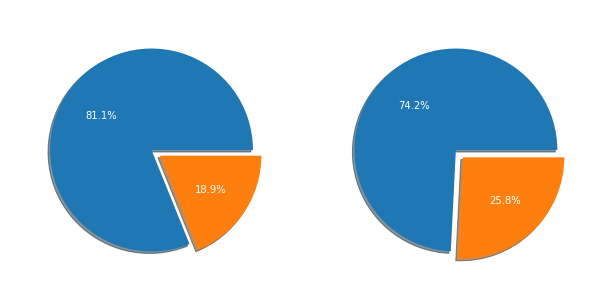

In [85]:
f,ax = plt.subplots(1,2,figsize=(10,5))
titanic.survived[titanic.sex == 'male'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],explode=[0,0.1],shadow=True)

titanic.survived[titanic.sex == 'female'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],explode=[0,0.1],shadow=True)

ax[0].set_title('surviced (male)')
ax[1].set_title('surviced (female)')

##### 등급별 생존자 수 차트

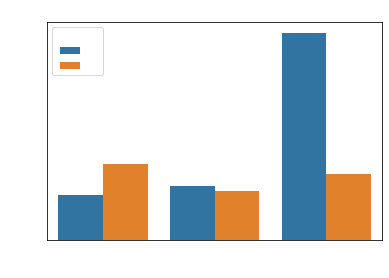

In [86]:
sns.countplot(x='pclass',data=titanic,hue='survived')
plt.title('Pclass vs Survived')
plt.show()

#### 상관분석

##### 상관계수 확인

In [87]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


#### 결과 시각화

##### 산점도 결과시각화 상관분석

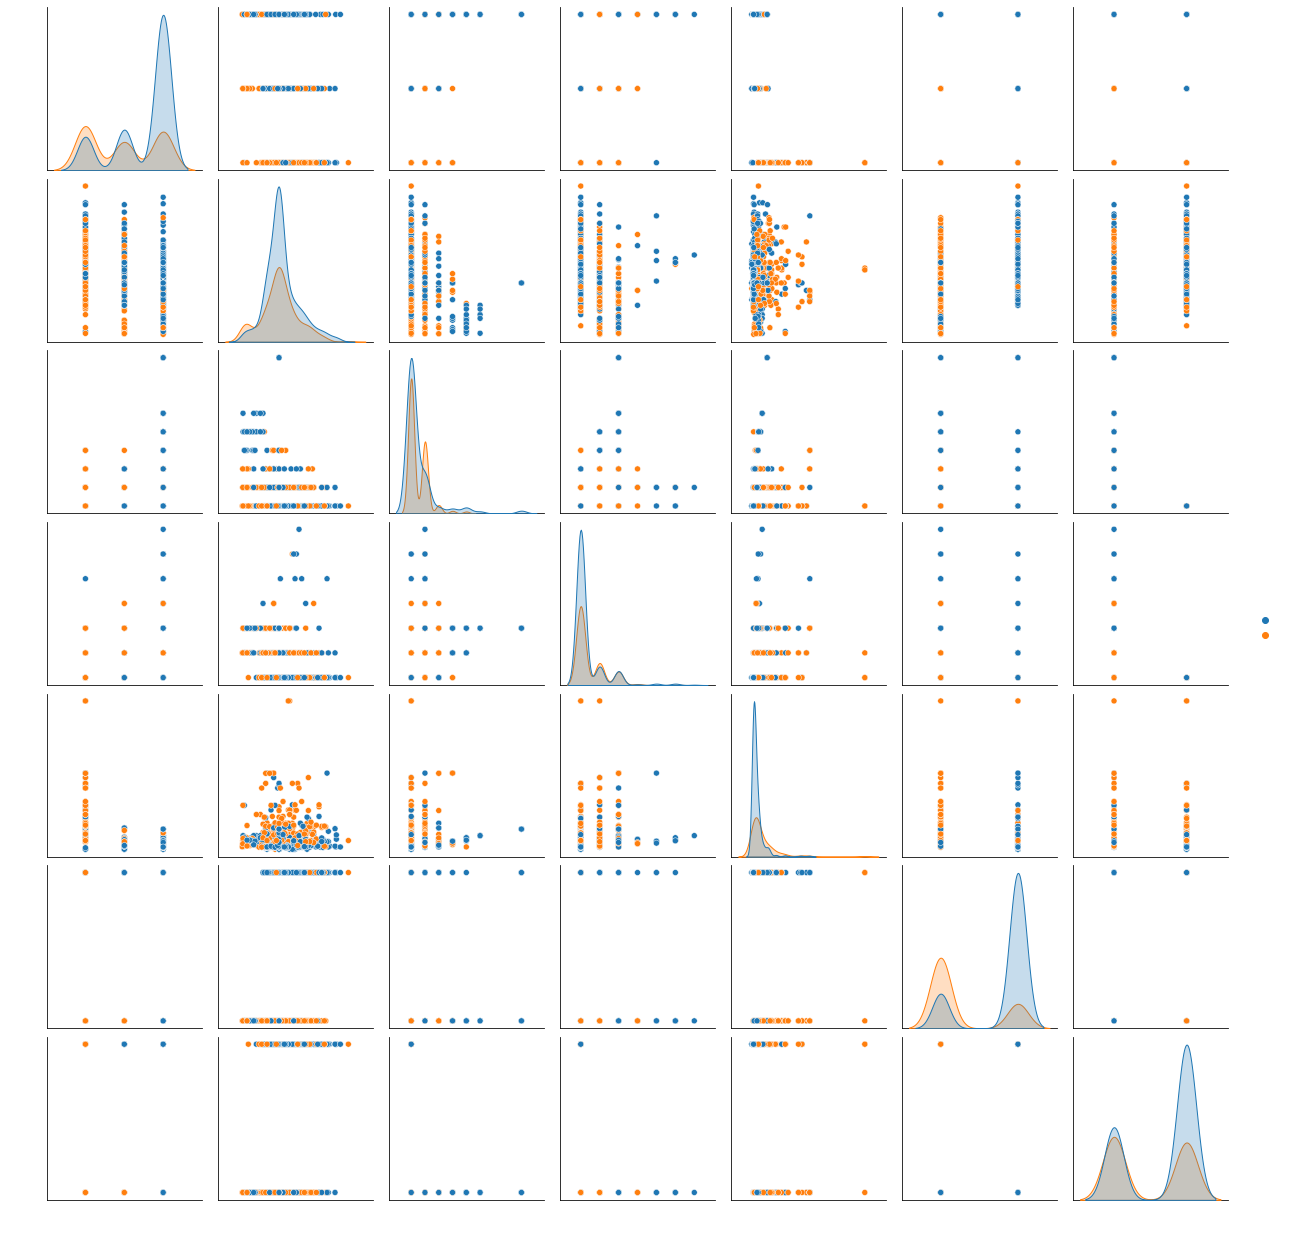

In [88]:
# bool type은 산점도에서 오류를 일으키기 때문에 'adult_male', 'alone'을 'int32'로 변경 해줘야 한다
titanic = titanic.astype({'adult_male':'int32','alone':'int32'})
sns.pairplot(titanic,hue='survived',vars=['pclass','age','sibsp','parch','fare','adult_male','alone'])
plt.show()

##### 두 변수간 상관관계를 시각화

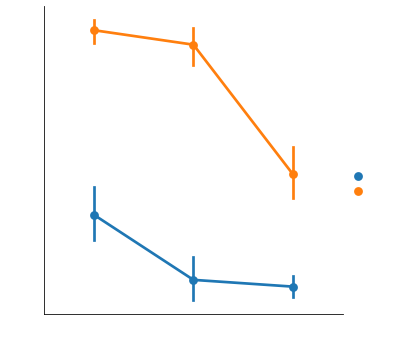

In [89]:
sns.catplot(x='pclass',y='survived',hue='sex',data=titanic,kind='point')
plt.show()

##### 변수 사이 상관계수를 히트맵으로 시각화

In [90]:
def category_age(x):
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    else:return 7

In [91]:
titanic['age_band'] = titanic.age.apply(category_age)

In [92]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_band
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,C,Southampton,no,0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,C,Southampton,yes,1,2


In [93]:
titanic.sex = titanic.sex.map({'male':1,'female':0})

In [94]:
titanic['family'] = titanic.sibsp+titanic.parch+1

In [95]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_band,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,C,Southampton,no,0,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,C,Southampton,yes,1,2,1


In [96]:
titanic.to_csv('./data/titanic_datahandling.csv',index=False,encoding='utf8')

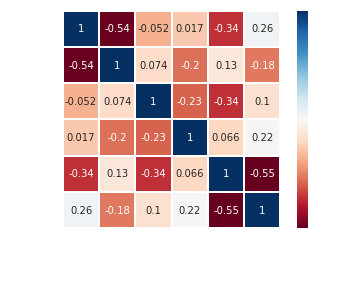

In [106]:
# 히트맵 그리기
heatmap_data = titanic[['survived','sex','age_band','family','pclass','fare']]
color_map = plt.cm.RdBu

sns.heatmap(data=heatmap_data.astype(float).corr(),linewidths=0.1,square=True,cmap=color_map,annot=True)
plt.show()